<a href="https://colab.research.google.com/github/opgan/Covid19EDA/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro

Covid-19 data ....

Objective ....

Intended Outcome ...



## Ingest

COVID-19 Data from [New York Times Github](https://github.com/nytimes/covid-19-data/blob/master/us-counties-recent.csv)

In [81]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

# NBVAL_IGNORE_OUTPUT
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485


In [82]:
print(df.head())
print(df.tail())
print(df.columns)
print(df.shape)
print(df.info())


         date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0
             date          state  fips    cases  deaths
61937  2023-03-23       Virginia    51  2298300   23782
61938  2023-03-23     Washington    53  1940704   15905
61939  2023-03-23  West Virginia    54   645710    8132
61940  2023-03-23      Wisconsin    55  2014524   16485
61941  2023-03-23        Wyoming    56   185800    2014
Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')
(61942, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61942 entries, 0 to 61941
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    61942 non-null  object
 1   state   61942 non-null  object
 2   fips    61942 non-null  int64 
 3   cases   61

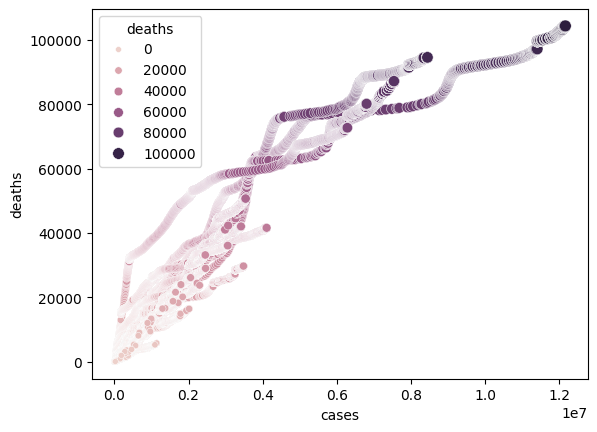

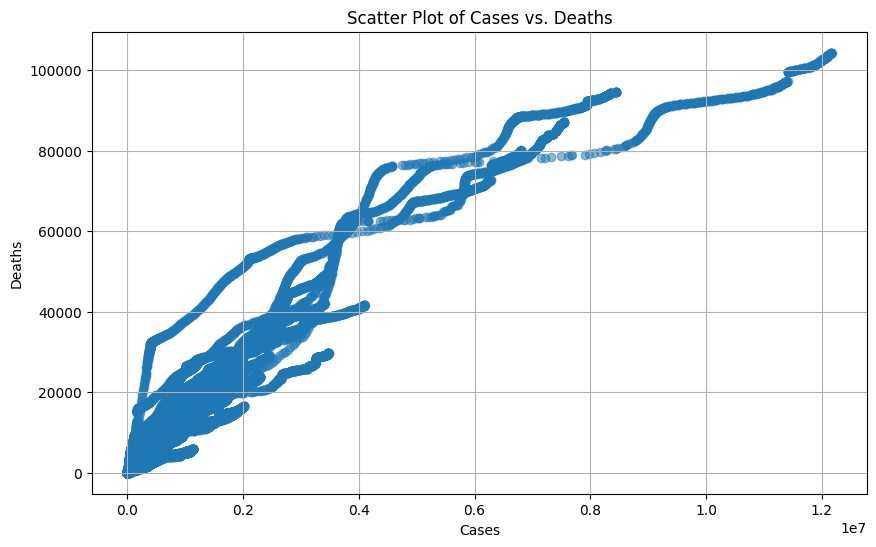

In [83]:
# prompt: scatterplot

import matplotlib.pyplot as plt

import seaborn as sns

# plot 1
sns.scatterplot(x="cases", y="deaths",
                hue="deaths",size="deaths", data=df)

# plot 2
# Assuming 'cases' and 'deaths' are columns in your dataframe
# Replace 'cases' and 'deaths' with the actual column names if different

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df['cases'], df['deaths'], alpha=0.5) # Adjust alpha for transparency
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.title('Scatter Plot of Cases vs. Deaths')
plt.grid(True)
plt.show()

## EDA

In [84]:
# Statistics tells that max dealths is over 100k. which state? and when?
print(df.describe())

               fips         cases         deaths
count  61942.000000  6.194200e+04   61942.000000
mean      32.247958  8.898301e+05   11779.067499
std       18.788383  1.470231e+06   17345.774849
min        1.000000  1.000000e+00       0.000000
25%       17.000000  7.078350e+04    1171.000000
50%       31.000000  3.514960e+05    5035.000000
75%       46.000000  1.043231e+06   14912.000000
max       78.000000  1.216916e+07  104277.000000


**Date-based EDA**

*Filter by deaths and date range*

             date       state  fips     cases  deaths
61331  2023-03-13  California     6  12134760  104027
61387  2023-03-14  California     6  12135588  104038
61443  2023-03-15  California     6  12136243  104047
61499  2023-03-16  California     6  12152129  104114
61555  2023-03-17  California     6  12153079  104130
61611  2023-03-18  California     6  12153079  104130
61667  2023-03-19  California     6  12153083  104130
61723  2023-03-20  California     6  12154293  104165
61779  2023-03-21  California     6  12154941  104185
61835  2023-03-22  California     6  12155467  104196
61891  2023-03-23  California     6  12169158  104277


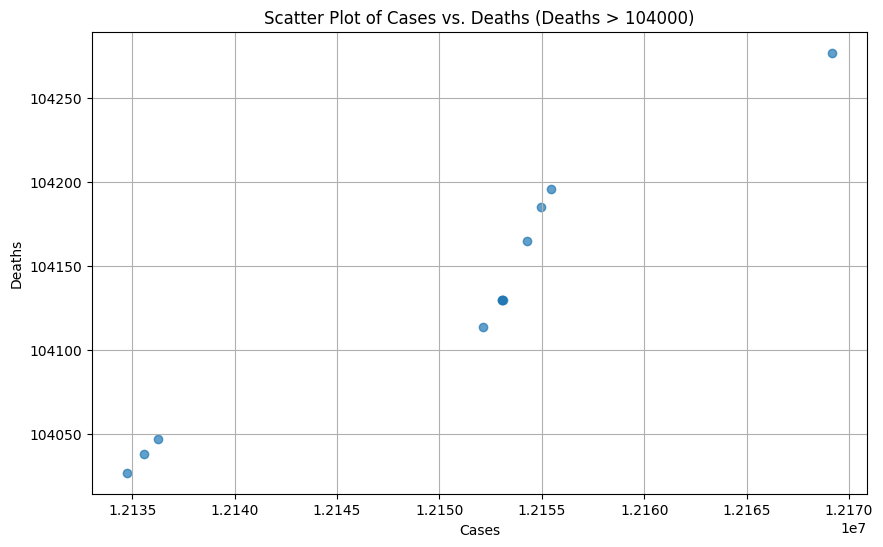

In [85]:
# prompt: filter df by deaths
import matplotlib.pyplot as plt
import seaborn as sns
# Continue from the provided code

# Filter by deaths (example: deaths greater than 10000)
deaths_threshold = 104000
filtered_df = df[df['deaths'] > deaths_threshold]
print(filtered_df)

# You can further process or visualize the filtered data
# For example, plot the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['cases'], filtered_df['deaths'], alpha=0.7)
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.title(f'Scatter Plot of Cases vs. Deaths (Deaths > {deaths_threshold})')
plt.grid(True)
plt.show()

             date          state  fips    cases  deaths
240    2020-03-01        Arizona     4        1       0
241    2020-03-01     California     6       33       0
242    2020-03-01        Florida    12        2       0
243    2020-03-01       Illinois    17        3       0
244    2020-03-01  Massachusetts    25        1       0
...           ...            ...   ...      ...     ...
61937  2023-03-23       Virginia    51  2298300   23782
61938  2023-03-23     Washington    53  1940704   15905
61939  2023-03-23  West Virginia    54   645710    8132
61940  2023-03-23      Wisconsin    55  2014524   16485
61941  2023-03-23        Wyoming    56   185800    2014

[61702 rows x 5 columns]


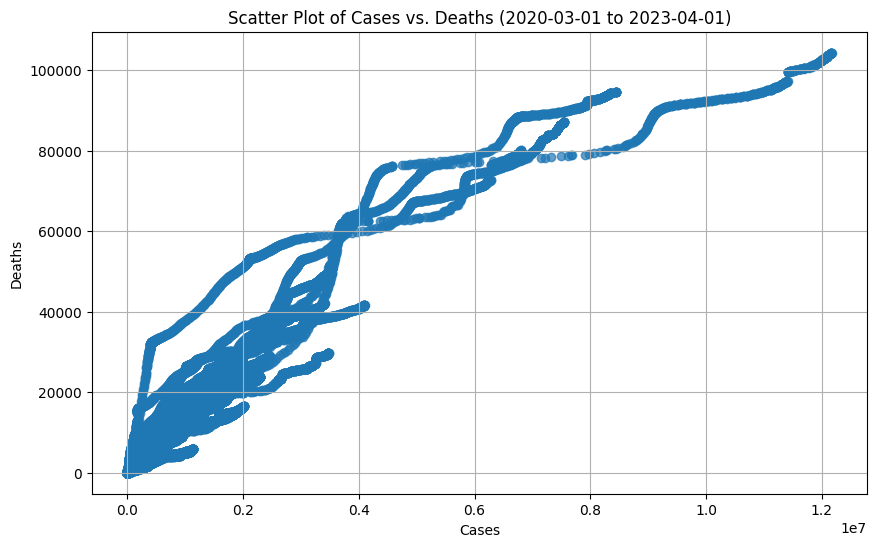

In [86]:
# prompt: filter by data range
import matplotlib.pyplot as plt
import seaborn as sns
# Continue from the provided code

# Filter by date range (example: from 2020-03-01 to 2020-04-01)
start_date = '2020-03-01'
end_date = '2023-04-01'
date_filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
print(date_filtered_df)


# You can further process or visualize the filtered data
# For example, plot the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(date_filtered_df['cases'], date_filtered_df['deaths'], alpha=0.7)
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.title(f'Scatter Plot of Cases vs. Deaths ({start_date} to {end_date})')
plt.grid(True)
plt.show()

<ipython-input-92-0a3cae8bb22b>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout() # Improve layout to prevent labels from overlapping


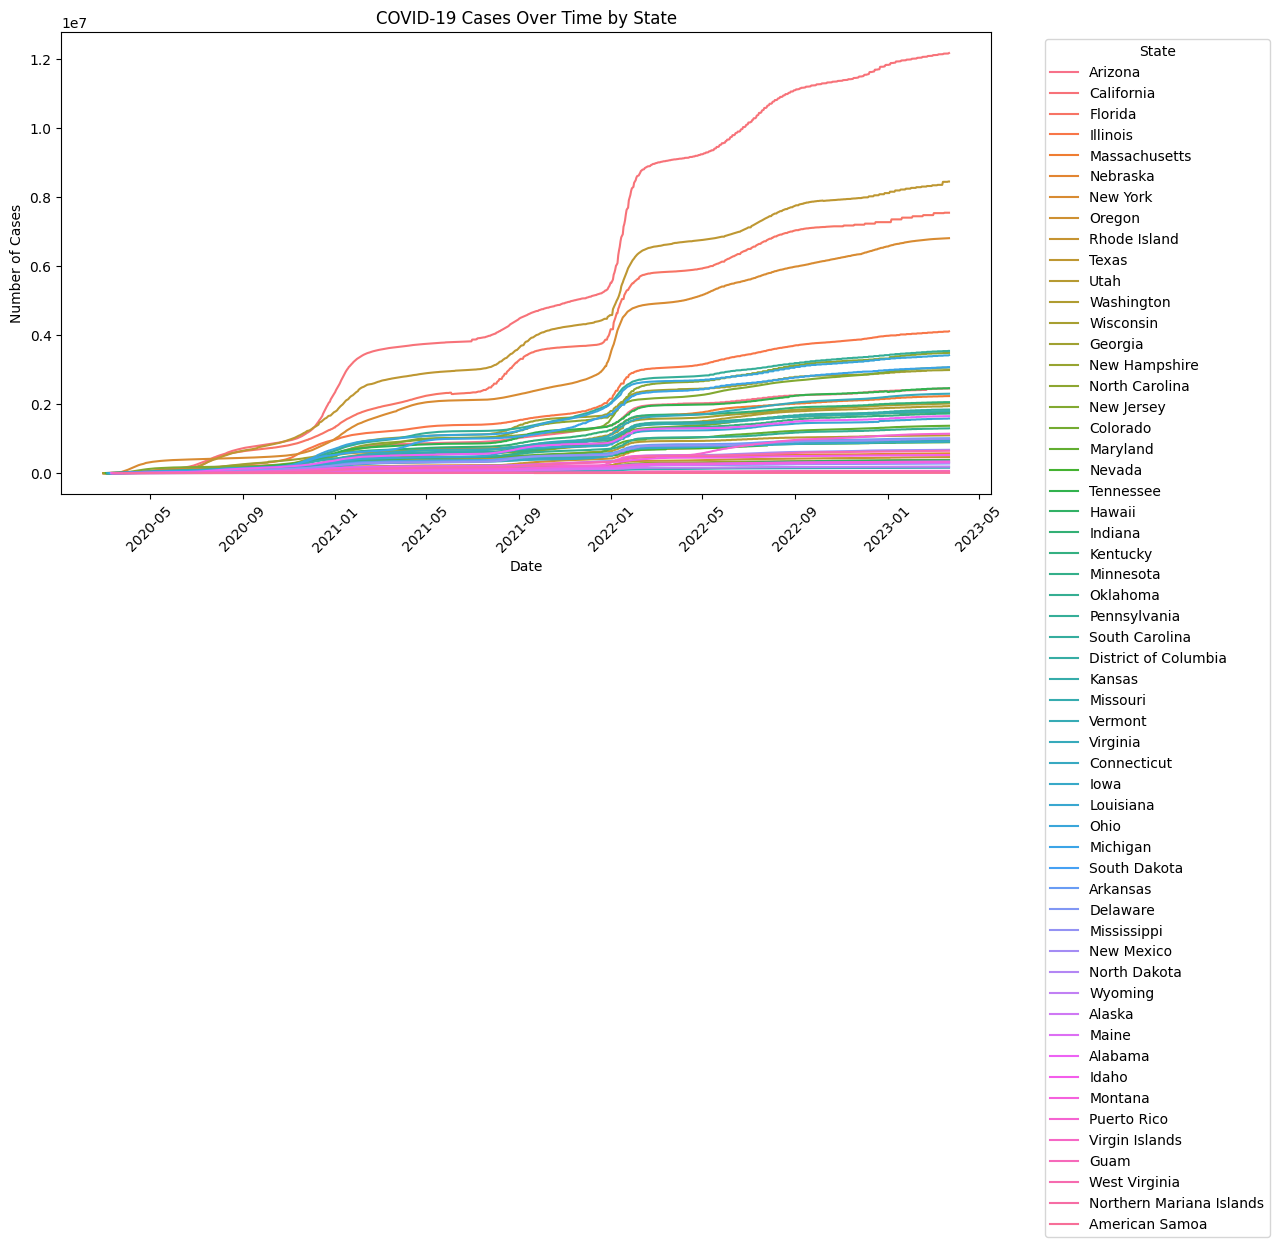

In [92]:
# prompt: plot date_filtered_df by states
import matplotlib.pyplot as plt
import seaborn as sns
# Convert the 'date' column to datetime objects if it's not already
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df = df.set_index('date')

# Filter by date range (example: from 2020-03-01 to 2020-04-01)
start_date = '2020-03-01'
end_date = '2023-04-01'
date_filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

# Plotting
plt.figure(figsize=(12, 6))
# NBVAL_IGNORE_OUTPUT
sns.lineplot(x=date_filtered_df.index, y='cases', hue='state', data=date_filtered_df)
plt.title('COVID-19 Cases Over Time by State')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.tight_layout() # Improve layout to prevent labels from overlapping

# NBVAL_IGNORE_OUTPUT
plt.show()

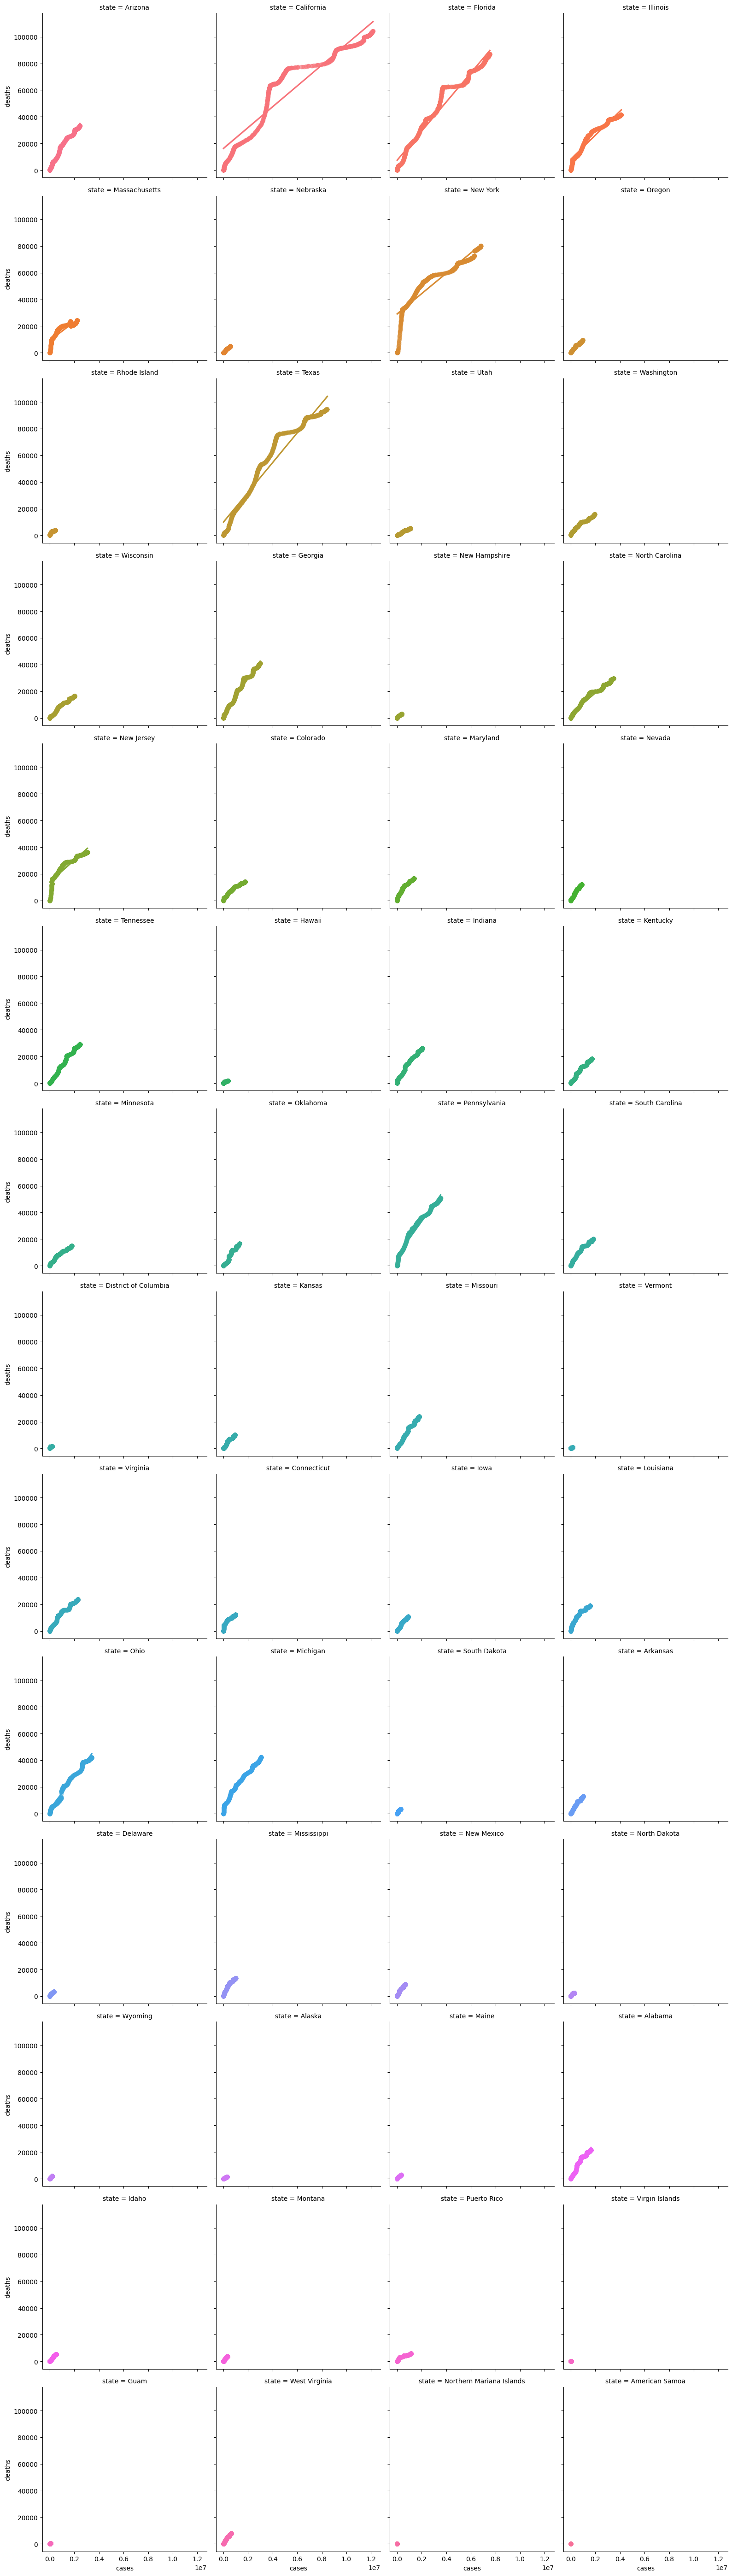

In [88]:
# prompt: plot date_filtered_df by states using lmplot subplots

# Assuming 'date_filtered_df' is already defined and properly formatted
# with 'date' as the index and columns for 'cases', 'deaths', and 'state'.

import seaborn as sns
import matplotlib.pyplot as plt

# Create lmplot with subplots for each state
sns.lmplot(x="cases", y="deaths", hue="state", data=date_filtered_df, col="state", col_wrap=4, height=4, aspect=1, scatter_kws={'alpha':0.5})  # Adjust col_wrap and height/aspect for layout

plt.show()

State Based Analysis

state
California        6315141921
Texas             4640982014
Florida           4065043272
New York          3481460364
Illinois          2184024652
Pennsylvania      1884002397
Ohio              1813202197
North Carolina    1775818771
Georgia           1694478089
Michigan          1601347249
Name: cases, dtype: int64


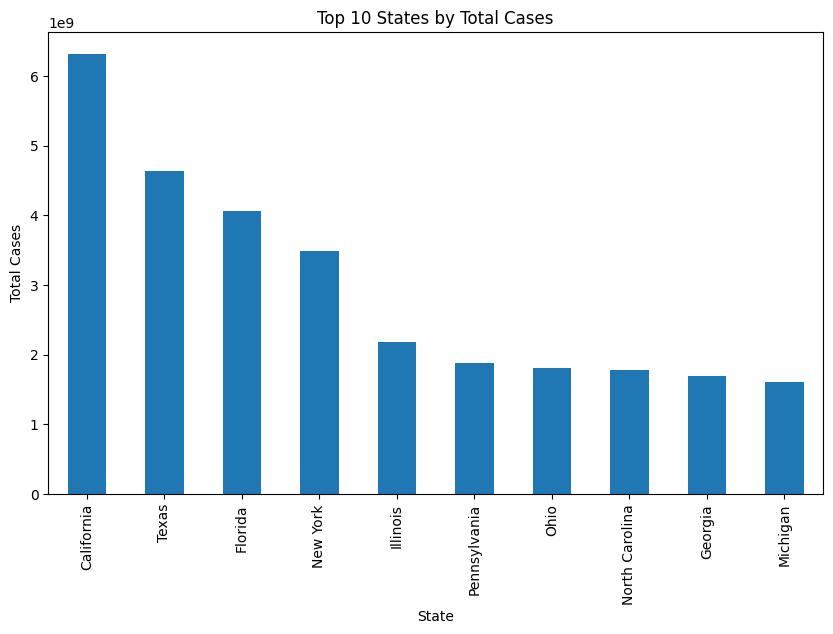

In [89]:
# prompt: top 10 states by cases
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has columns 'state' and 'cases'
# Group by state and sum cases, then sort in descending order
top_10_states = df.groupby('state')['cases'].sum().sort_values(ascending=False).head(10)

# Print or visualize the results
print(top_10_states)

# Visualization (optional)
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Top 10 States by Total Cases')
plt.show()

state
California      67503932
Texas           62871518
New York        59061061
Florida         52694427
Pennsylvania    32653246
Illinois        28833752
New Jersey      28482863
Michigan        26110438
Georgia         25872159
Ohio            25744838
Name: deaths, dtype: int64


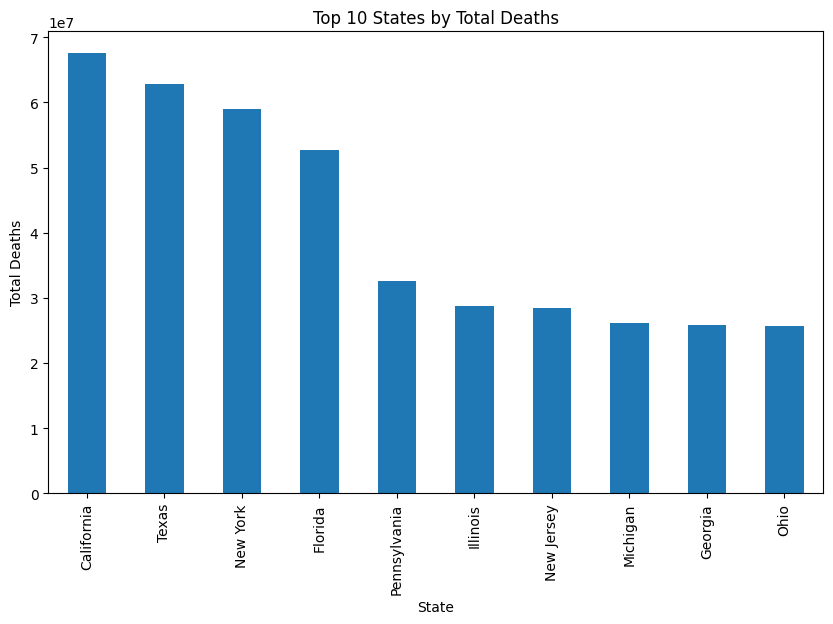

In [90]:
# prompt: Top 10 states by deaths
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has columns 'state' and 'deaths'
# Group by state and sum deaths, then sort in descending order
top_10_states_deaths = df.groupby('state')['deaths'].sum().sort_values(ascending=False).head(10)

# Print or visualize the results
print(top_10_states_deaths)

# Visualization (optional)
plt.figure(figsize=(10, 6))
top_10_states_deaths.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.title('Top 10 States by Total Deaths')
plt.show()

state
California      104277
Texas            94518
Florida          87141
New York         80138
Pennsylvania     50701
Michigan         42311
Ohio             42061
Illinois         41618
Georgia          41055
New Jersey       36097
Name: deaths, dtype: int64


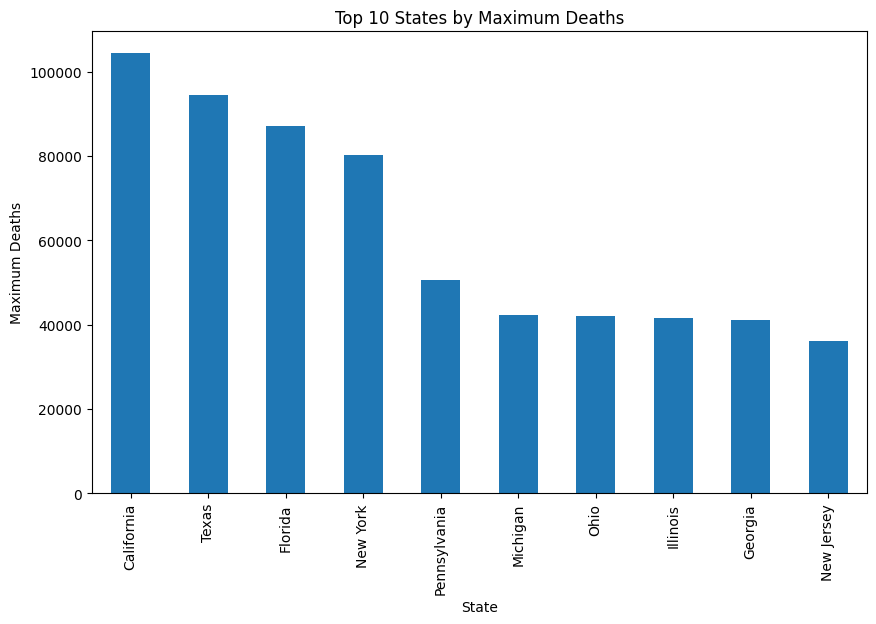

In [91]:
# prompt: top 10 states by maximum deaths
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has columns 'state' and 'deaths'
# Group by state and get the maximum deaths, then sort in descending order
top_10_states_max_deaths = df.groupby('state')['deaths'].max().sort_values(ascending=False).head(10)

# Print or visualize the results
print(top_10_states_max_deaths)

# Visualization (optional)
plt.figure(figsize=(10, 6))
top_10_states_max_deaths.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Maximum Deaths')
plt.title('Top 10 States by Maximum Deaths')
plt.show()

## Modelling

## Conclusion